In [ ]:
import sys
!{sys.executable} -m pip install multiscale-spatial-image matplotlib pooch zarr

In [2]:
from multiscale_spatial_image import to_multiscale
import xarray as xr
import zarr
import pooch

Download an example dataset via the [Interplanetary Filesystem (IPFS)](https://ipfs.io/). Other notable, related Zarr stores include [ipfsspec](https://github.com/fsspec/ipfsspec) and [ipldstore](https://github.com/d70-t/ipldstore).

In [3]:
file_path = pooch.retrieve(
    url='https://w3s.link/ipfs/bafybeiagf37nmqk4plixdyjvfx5ohq4tdwcdgso3nv4d5j7n63xnvtmv74/cthead1.zarr.zip',
    known_hash='sha256:fe64173bbf416d58bbdb0fd86f6484372d63d8bfde8680d6ad9770f24bb69e93')

In [4]:
image_ds = xr.open_zarr(file_path)
image_ds

<xarray.Dataset>
Dimensions:  (y: 256, x: 256)
Coordinates:
  * x        (x) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
  * y        (y) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
Data variables:
    cthead1  (y, x) uint8 dask.array<chunksize=(64, 64), meta=np.ndarray>

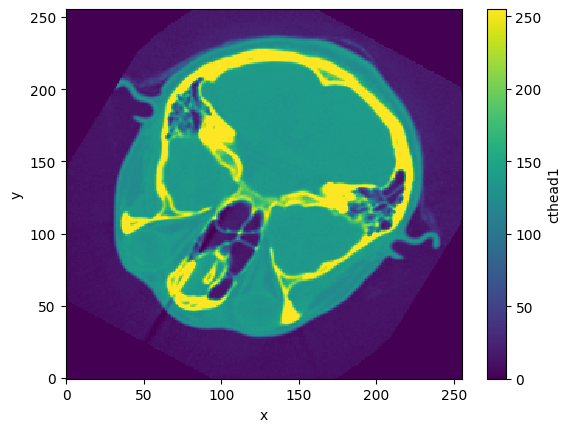

In [5]:
image = image_ds.cthead1
image.plot.imshow()

In [6]:
multiscale = to_multiscale(image, [2,4])

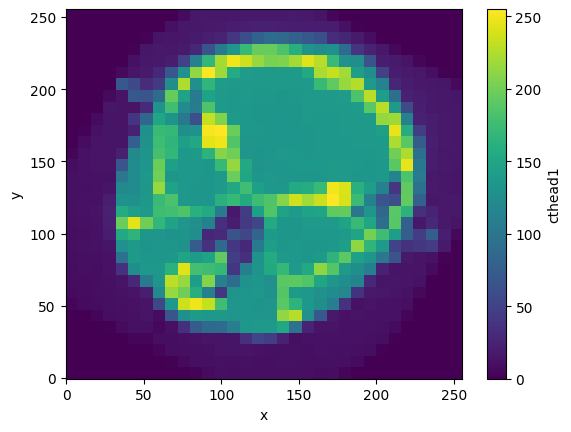

In [7]:
multiscale['scale2'].ds.cthead1.plot.imshow()

In [8]:
print(multiscale)

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (x: 256, y: 256)
│       Coordinates:
│         * x        (x) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
│         * y        (y) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
│       Data variables:
│           cthead1  (y, x) uint8 dask.array<chunksize=(256, 256), meta=np.ndarray>
│       Attributes:
│           direction:  [[1.0, 0.0], [0.0, 1.0]]
├── DataTree('scale1')
│       Dimensions:  (x: 128, y: 128)
│       Coordinates:
│         * x        (x) float64 0.5 2.5 4.5 6.5 8.5 ... 246.5 248.5 250.5 252.5 254.5
│         * y        (y) float64 0.5 2.5 4.5 6.5 8.5 ... 246.5 248.5 250.5 252.5 254.5
│       Data variables:
│           cthead1  (y, x) uint8 dask.array<chunksize=(128, 128), meta=np.ndarray>
│       Attributes:
│           direction:  [[1.0, 0.0], [0.0, 1.0]]
└── DataTree('scale2')
        Dimensions:  (x: 32, y: 32)
        Coordinates:
          * x        (x)

It is highly recommended to use `dimension_separator='/'` in the construction of Zarr stores.

This generates an [OME-NGFF](https://ngff.openmicroscopy.org/latest/) dataset.

In [9]:
store = zarr.storage.DirectoryStore('cthead1.zarr', dimension_separator='/')
multiscale.to_zarr(store)